# Part I - (Prosper Loan Data)
## by (DAISSINTA BAIDI Sammy Salim)

## Introduction
this document exploring dataset that contains 113,937 loans with 81 variables on each loan


## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

%matplotlib inline

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [2]:
loan=pd.read_csv('prosperLoanData.csv')

## high-level overview

### 1-number of rows and lignes in our dataset

In [3]:
loan.shape

(113937, 81)

### 2-type of variables of our dataset

In [4]:
loan.dtypes

ListingKey                              object
ListingNumber                            int64
ListingCreationDate                     object
CreditGrade                             object
Term                                     int64
LoanStatus                              object
ClosedDate                              object
BorrowerAPR                            float64
BorrowerRate                           float64
LenderYield                            float64
EstimatedEffectiveYield                float64
EstimatedLoss                          float64
EstimatedReturn                        float64
ProsperRating (numeric)                float64
ProsperRating (Alpha)                   object
ProsperScore                           float64
ListingCategory (numeric)                int64
BorrowerState                           object
Occupation                              object
EmploymentStatus                        object
EmploymentStatusDuration               float64
IsBorrowerHom

### 3- five's first rows and lignes of our dataset

In [5]:
loan.head(10)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20
5,0F05359734824199381F61D,1074836,2013-12-14 08:26:37.093000000,NaN,60,Current,NaN,0.15425,0.1314,0.1214,...,-25.33,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
6,0F0A3576754255009D63151,750899,2013-04-12 09:52:56.147000000,NaN,36,Current,NaN,0.31032,0.2712,0.2612,...,-22.95,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
7,0F1035772717087366F9EA7,768193,2013-05-05 06:49:27.493000000,NaN,36,Current,NaN,0.23939,0.2019,0.1919,...,-69.21,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
8,0F043596202561788EA13D5,1023355,2013-12-02 10:43:39.117000000,NaN,36,Current,NaN,0.07620,0.0629,0.0529,...,-16.77,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
9,0F043596202561788EA13D5,1023355,2013-12-02 10:43:39.117000000,NaN,36,Current,NaN,0.07620,0.0629,0.0529,...,-16.77,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1


### 4-variables of interest

In [6]:
columns = ['LoanKey', 'Term', 'LoanStatus', 'BorrowerAPR', 'BorrowerRate', 'ListingCategory (numeric)', 
           'BorrowerState', 'Occupation', 'EmploymentStatus', 'LoanOriginalAmount', 'CreditScoreRangeLower',
           'CreditScoreRangeUpper', 'DebtToIncomeRatio', 'Investors', 'StatedMonthlyIncome', 'MonthlyLoanPayment', 
           'IncomeVerifiable', 'ProsperRating (Alpha)','Recommendations']
loan_clean = loan[columns]

In [7]:
loan_clean.head(10)

,LoanKey,Term,LoanStatus,BorrowerAPR,BorrowerRate,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,LoanOriginalAmount,CreditScoreRangeLower,CreditScoreRangeUpper,DebtToIncomeRatio,Investors,StatedMonthlyIncome,MonthlyLoanPayment,IncomeVerifiable,ProsperRating (Alpha),Recommendations
0,E33A3400205839220442E84,36,Completed,0.16516,0.1580,0,CO,Other,Self-employed,9425,640.0,659.0,0.17,258,3083.333333,330.43,True,NaN,0
1,9E3B37071505919926B1D82,36,Current,0.12016,0.0920,2,CO,Professional,Employed,10000,680.0,699.0,0.18,1,6125.000000,318.93,True,A,0
2,6954337960046817851BCB2,36,Completed,0.28269,0.2750,0,GA,Other,Not available,3001,480.0,499.0,0.06,41,2083.333333,123.32,True,NaN,0
3,A0393664465886295619C51,36,Current,0.12528,0.0974,16,GA,Skilled Labor,Employed,10000,800.0,819.0,0.15,158,2875.000000,321.45,True,A,0
4,A180369302188889200689E,36,Current,0.24614,0.2085,2,MN,Executive,Employed,15000,680.0,699.0,0.26,20,9583.333333,563.97,True,D,0
5,C3D63702273952547E79520,60,Current,0.15425,0.1314,1,NM,Professional,Employed,15000,740.0,759.0,0.36,1,8333.333333,342.37,True,B,0
6,CE963680102927767790520,36,Current,0.31032,0.2712,1,KS,Sales - Retail,Employed,3000,680.0,699.0,0.27,1,2083.333333,122.67,True,E,0
7,0C87368108902149313D53B,36,Current,0.23939,0.2019,2,CA,Laborer,Employed,10000,700.0,719.0,0.24,1,3355.750000,372.60,True,C,0
8,02163700809231365A56A1C,36,Current,0.07620,0.0629,7,IL,Food Service,Employed,10000,820.0,839.0,0.25,1,3333.333333,305.54,True,AA,0
9,02163700809231365A56A1C,36,Current,0.07620,0.0629,7,IL,Food Service,Employed,10000,820.0,839.0,0.25,1,3333.333333,305.54,True,AA,0


### 5-dupllicated value

In [8]:
loan_clean.duplicated().sum()

871

In [9]:
loan_clean.drop_duplicates()

,LoanKey,Term,LoanStatus,BorrowerAPR,BorrowerRate,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,LoanOriginalAmount,CreditScoreRangeLower,CreditScoreRangeUpper,DebtToIncomeRatio,Investors,StatedMonthlyIncome,MonthlyLoanPayment,IncomeVerifiable,ProsperRating (Alpha),Recommendations
0,E33A3400205839220442E84,36,Completed,0.16516,0.1580,0,CO,Other,Self-employed,9425,640.0,659.0,0.17000,258,3083.333333,330.43,True,NaN,0
1,9E3B37071505919926B1D82,36,Current,0.12016,0.0920,2,CO,Professional,Employed,10000,680.0,699.0,0.18000,1,6125.000000,318.93,True,A,0
2,6954337960046817851BCB2,36,Completed,0.28269,0.2750,0,GA,Other,Not available,3001,480.0,499.0,0.06000,41,2083.333333,123.32,True,NaN,0
3,A0393664465886295619C51,36,Current,0.12528,0.0974,16,GA,Skilled Labor,Employed,10000,800.0,819.0,0.15000,158,2875.000000,321.45,True,A,0
4,A180369302188889200689E,36,Current,0.24614,0.2085,2,MN,Executive,Employed,15000,680.0,699.0,0.26000,20,9583.333333,563.97,True,D,0
5,C3D63702273952547E79520,60,Current,0.15425,0.1314,1,NM,Professional,Employed,15000,740.0,759.0,0.36000,1,8333.333333,342.37,True,B,0
6,CE963680102927767790520,36,Current,0.31032,0.2712,1,KS,Sales - Retail,Employed,3000,680.0,699.0,0.27000,1,2083.333333,122.67,True,E,0
7,0C87368108902149313D53B,36,Current,0.23939,0.2019,2,CA,Laborer,Employed,10000,700.0,719.0,0.24000,1,3355.750000,372.60,True,C,0
8,02163700809231365A56A1C,36,Current,0.07620,0.0629,7,IL,Food Service,Employed,10000,820.0,839.0,0.25000,1,3333.333333,305.54,True,AA,0
10,7C083651269973612460D6D,60,Current,0.27462,0.2489,1,MD,Fireman,Employed,13500,640.0,659.0,0.12000,19,7500.000000,395.37,True,C,0


### 6-missing value

In [10]:
loan_clean.isnull().sum()

LoanKey                          0
Term                             0
LoanStatus                       0
BorrowerAPR                     25
BorrowerRate                     0
ListingCategory (numeric)        0
BorrowerState                 5515
Occupation                    3588
EmploymentStatus              2255
LoanOriginalAmount               0
CreditScoreRangeLower          591
CreditScoreRangeUpper          591
DebtToIncomeRatio             8554
Investors                        0
StatedMonthlyIncome              0
MonthlyLoanPayment               0
IncomeVerifiable                 0
ProsperRating (Alpha)        29084
Recommendations                  0
dtype: int64

In [11]:
loan_clean.BorrowerState.value_counts()

CA    14717
TX     6842
NY     6729
FL     6720
IL     5921
GA     5008
OH     4197
MI     3593
VA     3278
NJ     3097
NC     3084
WA     3048
PA     2972
MD     2821
MO     2615
MN     2318
MA     2242
CO     2210
IN     2078
AZ     1901
WI     1842
OR     1817
TN     1737
AL     1679
CT     1627
SC     1122
NV     1090
KS     1062
KY      983
OK      971
LA      954
UT      877
AR      855
MS      787
NE      674
ID      599
NH      551
NM      472
RI      435
HI      409
WV      391
DC      382
MT      330
DE      300
VT      207
AK      200
SD      189
IA      186
WY      150
ME      101
ND       52
Name: BorrowerState, dtype: int64

In [12]:
loan_clean.Occupation.value_counts()

Other                                 28617
Professional                          13628
Computer Programmer                    4478
Executive                              4311
Teacher                                3759
Administrative Assistant               3688
Analyst                                3602
Sales - Commission                     3446
Accountant/CPA                         3233
Clerical                               3164
Sales - Retail                         2797
Skilled Labor                          2746
Retail Management                      2602
Nurse (RN)                             2489
Construction                           1790
Truck Driver                           1675
Laborer                                1595
Police Officer/Correction Officer      1578
Civil Service                          1457
Engineer - Mechanical                  1406
Military Enlisted                      1272
Food Service Management                1239
Engineer - Electrical           

In [13]:
loan_clean.EmploymentStatus.value_counts()

Employed         67322
Full-time        26355
Self-employed     6134
Not available     5347
Other             3806
Part-time         1088
Not employed       835
Retired            795
Name: EmploymentStatus, dtype: int64

In [14]:
loan_clean.rename(columns={'ProsperRating (Alpha)': 'ProsperRating_Alpha'},inplace=True)
loan_clean.ProsperRating_Alpha.value_counts()

C     18345
B     15581
A     14551
D     14274
E      9795
HR     6935
AA     5372
Name: ProsperRating_Alpha, dtype: int64

### 6-Manage the empty value

In [15]:
loan_clean.Occupation.fillna('Other', inplace=True)
loan_clean.EmploymentStatus.fillna('Other', inplace=True)
loan_clean=loan_clean.dropna()

In [16]:
loan_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77557 entries, 1 to 113936
Data columns (total 19 columns):
LoanKey                      77557 non-null object
Term                         77557 non-null int64
LoanStatus                   77557 non-null object
BorrowerAPR                  77557 non-null float64
BorrowerRate                 77557 non-null float64
ListingCategory (numeric)    77557 non-null int64
BorrowerState                77557 non-null object
Occupation                   77557 non-null object
EmploymentStatus             77557 non-null object
LoanOriginalAmount           77557 non-null int64
CreditScoreRangeLower        77557 non-null float64
CreditScoreRangeUpper        77557 non-null float64
DebtToIncomeRatio            77557 non-null float64
Investors                    77557 non-null int64
StatedMonthlyIncome          77557 non-null float64
MonthlyLoanPayment           77557 non-null float64
IncomeVerifiable             77557 non-null bool
ProsperRating_Alpha   

In [17]:
loan_clean.rename(columns={'ListingCategory (numeric)': 'ListingCategory_numeric'},inplace=True)


In [18]:
loan_clean.shape

(77557, 19)

### What is the structure of your dataset?

The cleaned dataset consists of 77557 loan and 19 features

### What is/are the main feature(s) of interest in your dataset?

the main feature for us is the LoanStatus it will be interest to now what affect the LonStatus

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?
the features in dataset that we think will help investigation of feature of interest are:

- Term                         
- LoanStatus                   
- BorrowerAPR                  
- BorrowerRate                 
- ListingCategory_numeric    
- BorrowerState                
- Occupation                  
- EmploymentStatus             
- LoanOriginalAmount          
- CreditScoreRangeLower        
- CreditScoreRangeUpper        
- DebtToIncomeRatio            
- Investors                    
- StatedMonthlyIncome         
- MonthlyLoanPayment          
- IncomeVerifiable            
- ProsperRating_Alpha          
- Recommendations

## Univariate Exploration

In [19]:
#### a function to plot countplot 
def plot(dataset,yfeature,order,color,title):
    sb.countplot(data = dataset, y =yfeature, color=color, order=order)
    plt.ylabel(yfeature)
    plt.title(title)
    plt.show()

### question 1
we firstly begin with our features of interest: what is the distribution of LoanStatus?

### visualisation

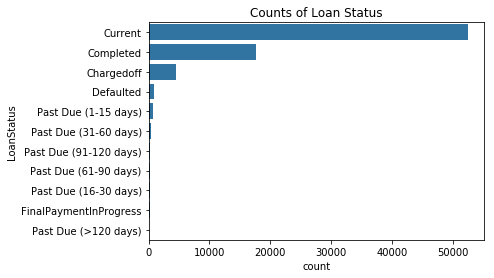

In [20]:
type_order = loan_clean['LoanStatus'].value_counts().index
color=sb.color_palette()[0]
plot(loan_clean,'LoanStatus',type_order,color,'Counts of Loan Status')

### observation
from the distribution of LoanStatus feature we can observe that the Loan Status must hight is Current

### question 2 what is the distribution of Employment Status

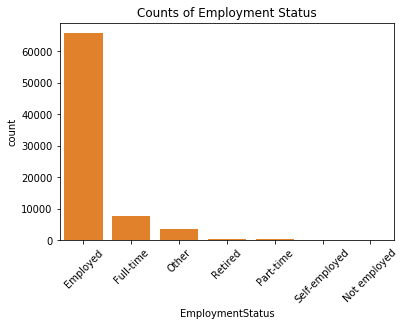

In [21]:
type_order = loan_clean['EmploymentStatus'].value_counts().index
sb.countplot(data = loan_clean, x ='EmploymentStatus', color=sb.color_palette()[1], order=type_order)
plt.ylabel('count')
plt.title('Counts of Employment Status')
plt.xticks(rotation = 45)
plt.show()

### observation
the most borrowers are Employed

### question 3
what is the distribution of Term loan?

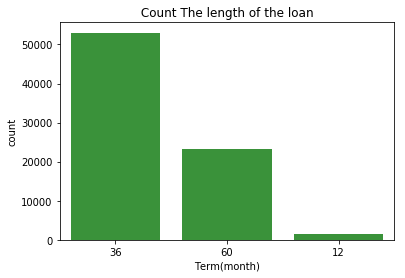

In [22]:
type_order = loan_clean['Term'].value_counts().index
sb.countplot(data = loan_clean, x ='Term', color=sb.color_palette()[2], order=type_order)
plt.ylabel('count')
plt.xlabel('Term(month)')
plt.title(' Count The length of the loan ')
plt.show()

### observation 
the most length of the loan are 36 month

### question 4 what is the distribution of ocupation of borrower?


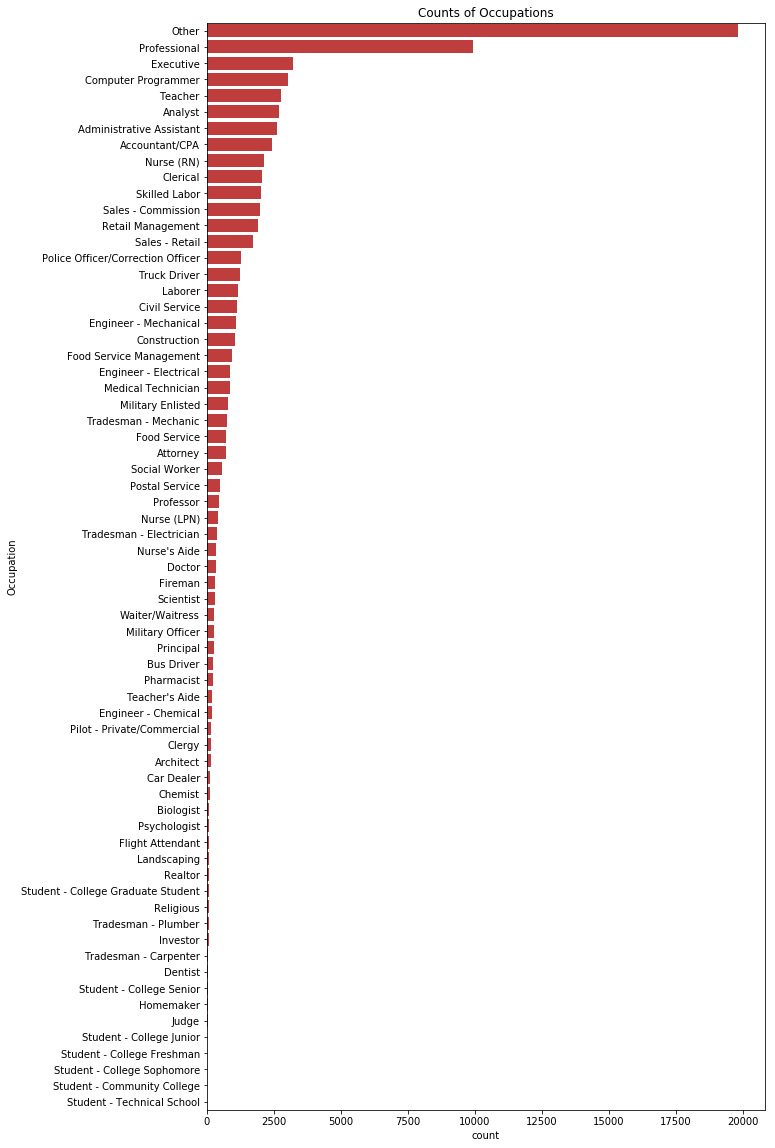

In [23]:
plt.subplots(figsize = [10,20])
color=sb.color_palette()[3]
type_order = loan_clean['Occupation'].value_counts().index
plot(loan_clean,'Occupation',type_order,color,'Counts of Occupations')

### observation
because Other and professional which are the two first occupation not give us usefull information we ignore it and we observe that: executive, computer programmer,  teacher ,analyst, administrative assistant are the five first occupation

### question 5 what is recommandations distribution  of borrower?

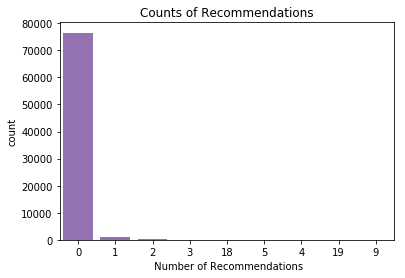

In [24]:
order = loan_clean['Recommendations'].value_counts().index
sb.countplot(data = loan_clean, x ='Recommendations', color=sb.color_palette()[4], order=order)
plt.xlabel(' Number of Recommendations')
plt.title('Counts of Recommendations')
plt.show()

### observation 
we look that most of the borrowers  have 0 recommandation  at the time the listing was created.

### question 6 what is the distribution rosperScore ?

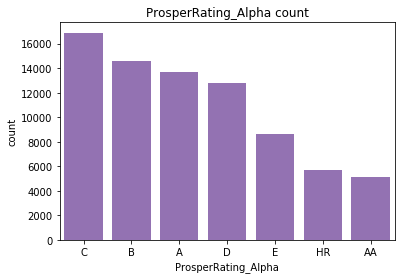

In [25]:
order =loan_clean['ProsperRating_Alpha'].value_counts().index
sb.countplot(data=loan_clean, x='ProsperRating_Alpha', color=sb.color_palette()[4], order=order);
plt.xlabel('ProsperRating_Alpha');
plt.title('ProsperRating_Alpha count');

### observation
we fine that the rating of most common borrowers is between C to D

### question 7 what is the distribution of Monthly Loan Payment

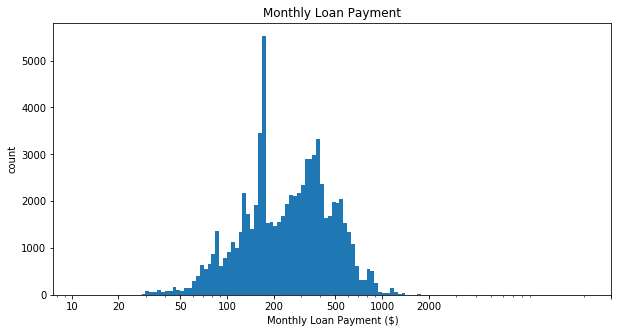

In [38]:
bins = 10 ** np.arange(1, np.log10(loan_clean['MonthlyLoanPayment'].max())+0.025, 0.025)
plt.figure(figsize=[10, 5])
plt.hist(data = loan_clean, x = 'MonthlyLoanPayment', bins = bins)
plt.xscale('log')
plt.xticks([10, 20, 50, 100, 200, 500, 1000, 2000, 30000], ['10', '20','50', '100', '200', '500', '1000', '2000'])
plt.xlabel('Monthly Loan Payment ($)')
plt.ylabel('count')
plt.title('Monthly Loan Payment')
plt.show()

### observation
we can see that the higths monthly payment are between 100 and 1000 but the most higth is between 100 and 200

### question 8 what is the distribution of StatedMonthlyIncome?

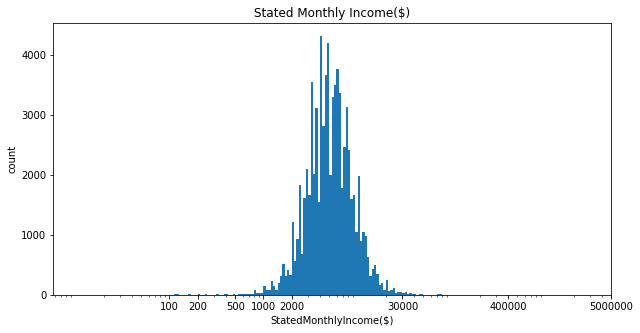

In [27]:
bins = 10 ** np.arange(1, np.log10(loan_clean['StatedMonthlyIncome'].max())+0.025, 0.025)
plt.figure(figsize=[10, 5])
plt.hist(data = loan_clean, x = 'StatedMonthlyIncome', bins = bins)
plt.xscale('log')
plt.xticks([100, 200, 500, 1e3, 2e3, 3e4, 4e5, 5e6], ['100', '200', '500', '1000', '2000','30000','400000','5000000'])
plt.xlabel('StatedMonthlyIncome($)')
plt.ylabel('count')
plt.title('Stated Monthly Income($)')
plt.show()

### observation 
the Stated Monthly Income of borrowers is most between 1000 and 30000

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

- the Stated Monthly Income of borrowers is most between 1000 and 30000
- we can see that the higths monthly payment are between 100 and 1000 but the most higth is between 100 and 200
- we fine that the rating of most common borrowers is between C to D
- we look that most of the borrowers  have 0 recommandation  at the time the listing was created.
- because Other and professional which are the two first occupation not give us usefull information we ignore it and we observe that: executive, computer programmer,  teacher ,analyst, administrative assistant are the five first occupation
- the most length of the loan are 36 month
- the most borrowers are Employed
- from the distribution of LoanStatus feature we can observe that the Loan Status must hight is Current


### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

I have made any operation on my data after features investigqtion

## Bivariate Exploration

### question 9 what is the correlations between pairwaises of numerics variables in the dataset

In [28]:
numeric_var = loan_clean.select_dtypes(include='number').columns

In [29]:
numeric_var

Index(['Term', 'BorrowerAPR', 'BorrowerRate', 'ListingCategory_numeric',
       'LoanOriginalAmount', 'CreditScoreRangeLower', 'CreditScoreRangeUpper',
       'DebtToIncomeRatio', 'Investors', 'StatedMonthlyIncome',
       'MonthlyLoanPayment', 'Recommendations'],
      dtype='object')

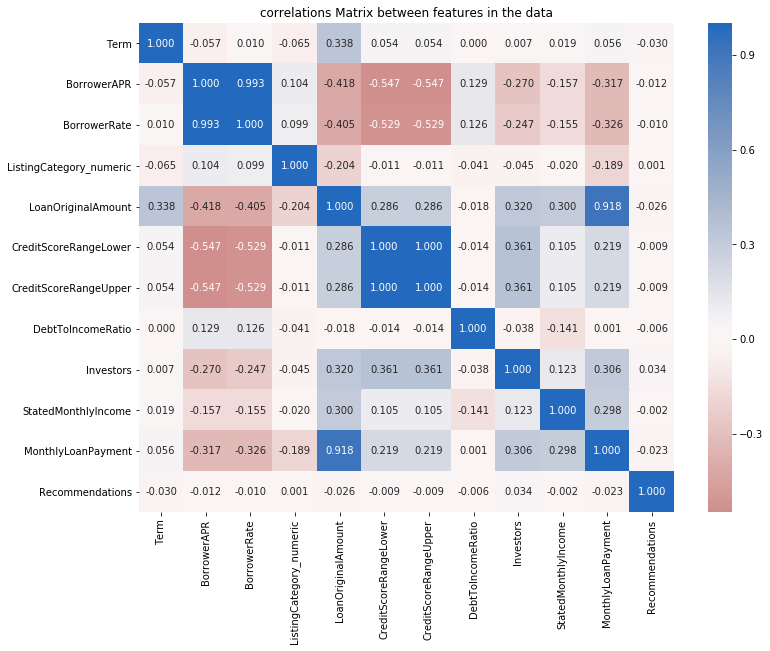

In [30]:
plt.figure(figsize = [12, 9])
sb.heatmap(loan_clean[numeric_var].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.title("correlations Matrix between features in the data")
plt.show()

### observation 
we see 
strong positive  correlation between creditScoreRangeLower and CreditScoreRangeUper, between LoanOrginalAmount and MonthtlyPayement, between BorrowerAPR and BorrowerRate

### question 10 what is the relation between  Loan Orginal Amount and Loan Statut?


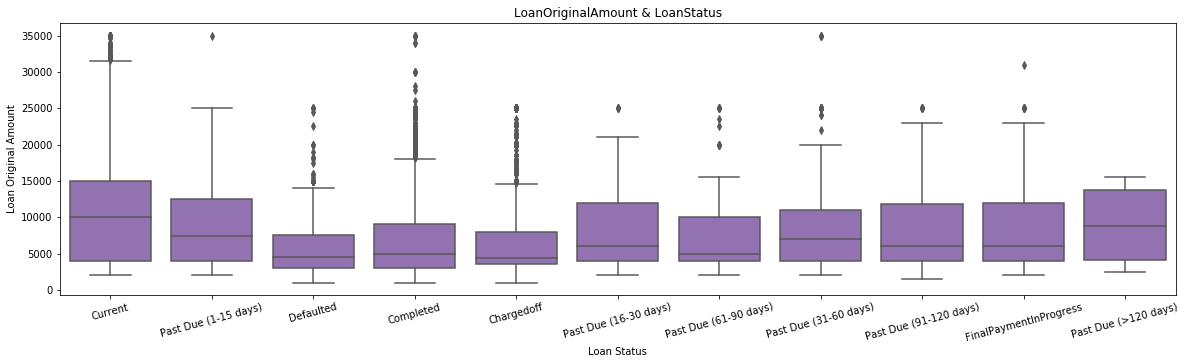

In [31]:
plt.figure(figsize = [20, 5])
sb.boxplot(data=loan_clean,y='LoanOriginalAmount',x='LoanStatus',color=sb.color_palette()[4]);
plt.title('LoanOriginalAmount & LoanStatus');
plt.ylabel('Loan Original Amount');
plt.xlabel('Loan Status');
plt.xticks(rotation=15);

### observation 
we note that completed, defaulted and chargedoff have the lower IQR

### question 11 what is the loan statut of loan categories?



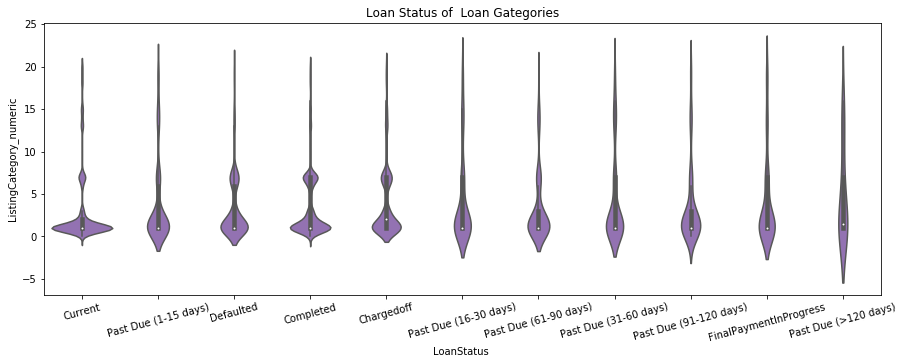

In [32]:
plt.figure(figsize = [15, 5])
sb.violinplot(data=loan_clean,x='LoanStatus', y='ListingCategory_numeric',color=sb.color_palette()[4]);
plt.title('Loan Status of  Loan Gategories')
plt.xlabel('LoanStatus ');
plt.ylabel('ListingCategory_numeric');
plt.xticks(rotation=15);

### observation
we see that all Loan Statut  have almost the same Listing Category

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

- we see that all Loan Statut  have almost the same Listing Category
- we note that defaulted and chargedoff have the lower IQR
- we see strong positive  correlation between creditScoreRangeLower and CreditScoreRangeUper, between LoanOrginalAmount and MonthtlyPayement, between BorrowerAPR and BorrowerRate

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

we see strong positive  correlation between creditScoreRangeLower and CreditScoreRangeUper, between LoanOrginalAmount and MonthtlyPayement, between BorrowerAPR and BorrowerRate

## Multivariate Exploration

### question 12 what correlation can we have between Loan Original Amount , Loan Original Amount  and Stated Monthly Income?

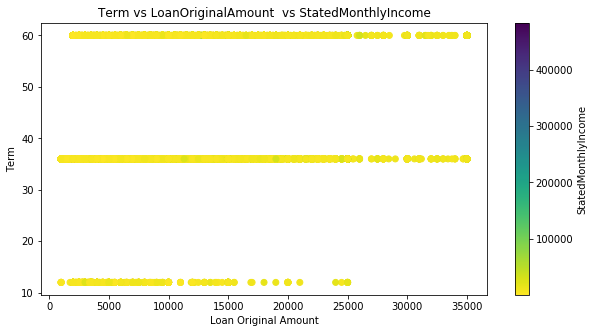

In [33]:

plt.figure(figsize = [10, 5])
plt.scatter(data=loan_clean,x='LoanOriginalAmount',y = 'Term',c='StatedMonthlyIncome',cmap = 'viridis_r')
plt.colorbar(label = 'StatedMonthlyIncome');
plt.xlabel('Loan Original Amount')
plt.ylabel('Term')
plt.title('Term vs LoanOriginalAmount  vs StatedMonthlyIncome');

### observation
we can see that there are negative correlation between Loan Original Amount , Term  and Stated Monthly Income and  
most of Loan Original Amount have StatedMonthlyIncome below of 100000$

### question 13 relation between Employment Status, Loan Status, EmploymentStatus

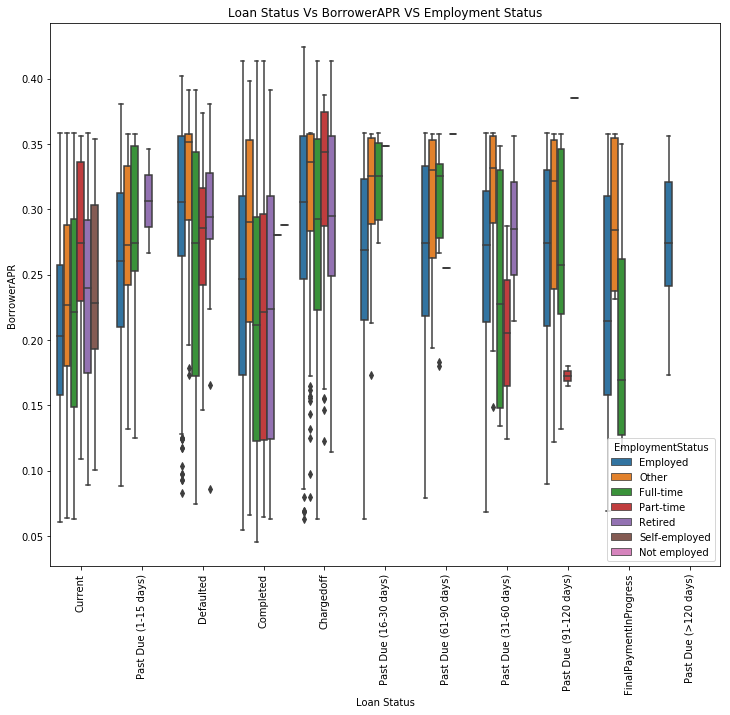

In [34]:
plt.figure(figsize=[12,10])
sb.boxplot(data=loan_clean, x="LoanStatus", y="BorrowerAPR", hue="EmploymentStatus");
plt.xticks(rotation = 90);
plt.xlabel('Loan Status');
plt.ylabel('BorrowerAPR');
plt.title('Loan Status Vs BorrowerAPR VS Employment Status');

### observation 
For each category of loan status, the lowest APR is generaly  for Employed and Full-time. the highest APR is generaly Not employed and self employed

#### question 14 relation between DebtToIncomeRatio, LoanOriginalAmount and LoanStatus

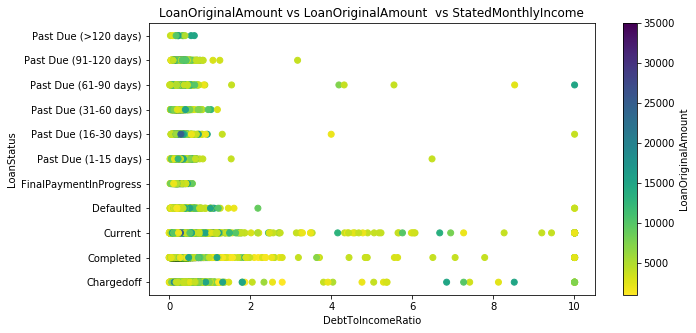

In [35]:
plt.figure(figsize = [10, 5])
plt.scatter(data=loan_clean,x='DebtToIncomeRatio',y = 'LoanStatus',c='LoanOriginalAmount',cmap = 'viridis_r')
plt.colorbar(label = 'LoanOriginalAmount');
plt.xlabel('DebtToIncomeRatio')
plt.ylabel('LoanStatus')
plt.title('LoanOriginalAmount vs LoanOriginalAmount  vs StatedMonthlyIncome');

### observation 
there are negative correlation between Debt To Income Ratio and Loan Status


### question 15

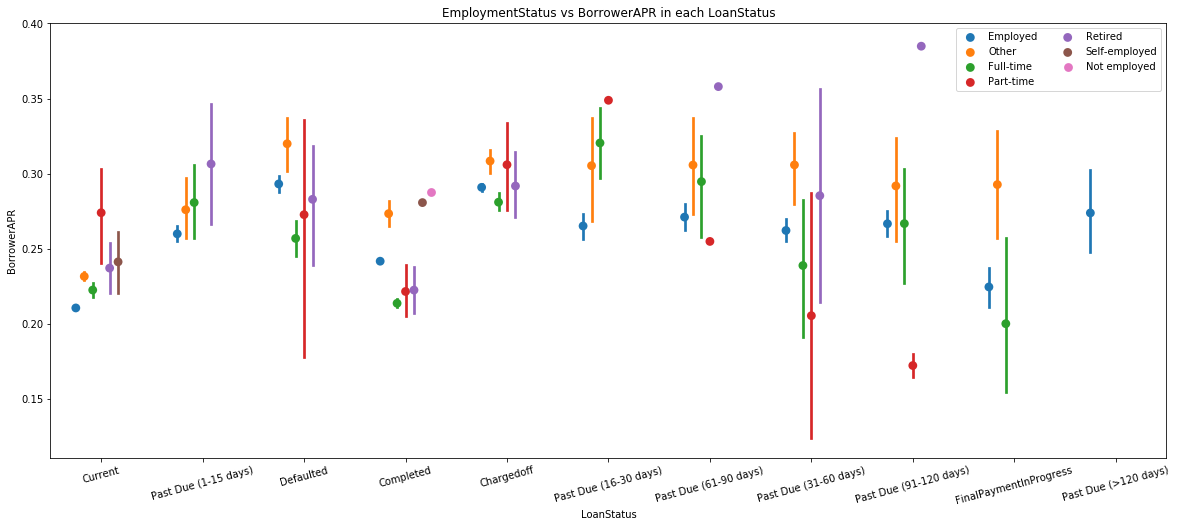

In [36]:
fig = plt.figure(figsize = [20,8])
ax = sb.pointplot(data = loan_clean, x = 'LoanStatus', y = 'BorrowerAPR', hue = 'EmploymentStatus', linestyles = "",
                  dodge = 0.5)
plt.ylabel('BorrowerAPR')
plt.xticks(rotation=15)
plt.title('EmploymentStatus vs BorrowerAPR in each LoanStatus')
plt.legend(ncol=2)
plt.show();

### observation
the past due loan have the most higth BorrowerAPR

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

- the past due loan have the most higth BorrowerAPR
- there are negative correlation between Debt To Income Ratio and Loan Status
- For each category of loan status, the lowest APR is generaly  for Employed and Full-time. the highest APR is generaly Not employed and self employed
- we can see that there are negative correlation between Loan Original Amount , Term and Stated Monthly Income and most of Loan Original Amount have StatedMonthlyIncome below of 100000($)
- 

### Were there any interesting or surprising interactions between features?- we firstly begin with our features of interest: what is the distribution of LoanStatus?

none

## Conclusions
after ours exploration we find this features in ours dataset:
- the Stated Monthly Income of borrowers is most between 1000 and 30000
- we can see that the higths monthly payment are between 100 and 1000 but the most higth is between 100 and 200
- we fine that the rating of most common borrowers is between C to D
- we look that most of the borrowers  have 0 recommandation  at the time the listing was created.
- because Other and professional which are the two first occupation not give us usefull information we ignore it and we observe that: executive, computer programmer,  teacher ,analyst, administrative assistant are the five first occupation
- the most length of the loan are 36 month
- the most borrowers are Employed
- from the distribution of LoanStatus feature we can observe that the Loan Status must hight is Current
- the past due loan have the most higth BorrowerAPR
- there are negative correlation between Debt To Income Ratio and Loan Status
- For each category of loan status, the lowest APR is generaly  for Employed and Full-time. the highest APR is generaly Not employed and self employed
- we can see that there are negative correlation between Loan Original Amount , Term and Stated Monthly Income and most of Loan Original Amount have StatedMonthlyIncome below of 100000($)
- we see that all Loan Statut  have almost the same Listing Category
- we note that defaulted and chargedoff have the lower IQR
- we see strong positive  correlation between creditScoreRangeLower and CreditScoreRangeUper, between LoanOrginalAmount and MonthtlyPayement, between BorrowerAPR and BorrowerRate


In [37]:
!jupyter nbconvert Part_I_exploration_template.ipynb --to pdf

[NbConvertApp] Converting notebook Part_I_exploration_template.ipynb to pdf
[NbConvertApp] Support files will be in Part_I_exploration_template_files/
[NbConvertApp] Making directory ./Part_I_exploration_template_files
[NbConvertApp] Making directory ./Part_I_exploration_template_files
[NbConvertApp] Making directory ./Part_I_exploration_template_files
[NbConvertApp] Making directory ./Part_I_exploration_template_files
[NbConvertApp] Making directory ./Part_I_exploration_template_files
[NbConvertApp] Making directory ./Part_I_exploration_template_files
[NbConvertApp] Making directory ./Part_I_exploration_template_files
[NbConvertApp] Making directory ./Part_I_exploration_template_files
[NbConvertApp] Making directory ./Part_I_exploration_template_files
[NbConvertApp] Making directory ./Part_I_exploration_template_files
[NbConvertApp] Making directory ./Part_I_exploration_template_files
[NbConvertApp] Writing 109425 bytes to ./notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Runn